## SCAMP-C6 Assessment

### By Raïssa TCHIBOZO

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
dataset=pd.read_csv("F:/Mes activités/Analyse de données/SCAMP/fake_job_postings.csv",sep=",")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Cleaning and Treatement

To analyse data, we will select especially some columns for our work: Job_id, title, industry, fraudulent and proceed to data cleaning

In [18]:
mydataset=dataset[["job_id","title","industry","fraudulent"]]
mydataset=mydataset.dropna()
print(mydataset.info())
print(mydataset.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12977 entries, 1 to 17879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_id      12977 non-null  int64 
 1   title       12977 non-null  object
 2   industry    12977 non-null  object
 3   fraudulent  12977 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 506.9+ KB
None
(12977, 4)


###Some statistics
Here, we will determine number of unique industries

In [19]:
Industries=mydataset.industry.unique()

Ind=mydataset.industry.value_counts()

print("Total number of industries", len(Industries))
data_not_fraud=mydataset[mydataset["fraudulent"]==1]
data_fraud=mydataset[mydataset["fraudulent"]==0]
print("Nomber of fraudulent job in dataset",data_fraud.shape[0])
print("Nomber of not fraudulent job in dataset",data_not_fraud.shape[0])
pourcentage_fraud=data_fraud.shape[0]*100/mydataset.shape[0]
pourcentage_not_fraud=data_not_fraud.shape[0]*100/mydataset.shape[0]
print("Pourcentage of fraudulent job in dataset",pourcentage_fraud)
print("Pourcentage of not fraudulent job in dataset",pourcentage_not_fraud)

Total number of industries 131
Nomber of fraudulent job in dataset 12386
Nomber of not fraudulent job in dataset 591
Pourcentage of fraudulent job in dataset 95.44578870309009
Pourcentage of not fraudulent job in dataset 4.5542112969099176


###  Finding out which industry has the highest number of fake job postings.

We find total number of fraudulent jobs by industries.
Because of the fact that number jobs by industries is not the same for all industries, we also use ratio in order to make a better comparaison between industries.
In dataframe1, we sort the industry according to the total number of fraudulent jobs in descending order
In dataframe2, we sort the industry according to the pourcentage of fraudulent jobs in descending order

For the plots, we 

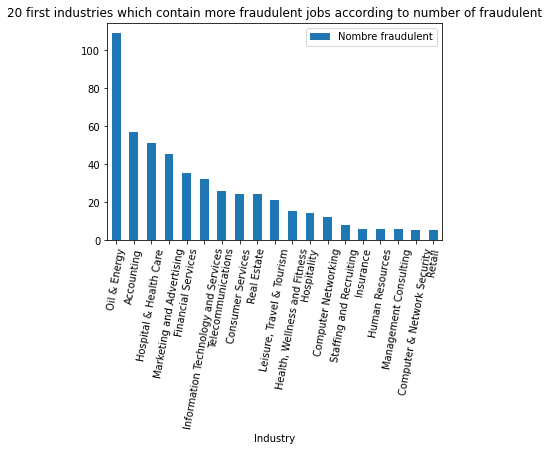

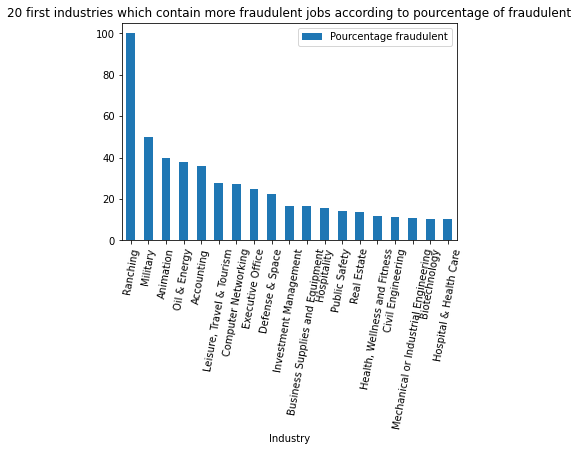

In [20]:
mydata=[]
nb_by_ind=[]
ratio=[]
for element in Industries:
    data_filter=mydataset.loc[(mydataset["fraudulent"]==1) & (mydataset["industry"]== element)]
    val=data_filter.shape[0]
    mydata.append(val)
    data_filter2=mydataset.loc[(mydataset["industry"]== element)]
    val2=data_filter2.shape[0]
    nb_by_ind.append(val2)
    ratio.append(val*100/val2)
    



d = {"Industry": Industries, "Nombre fraudulent": mydata}
d2= {"Industry": Industries, "Pourcentage fraudulent": ratio}
dataframe1 = pd.DataFrame(d)
dataframe2 = pd.DataFrame(d2)

dataframe1.sort_values(by="Nombre fraudulent", axis=0, ascending=False, inplace= True)
dataframe2.sort_values(by="Pourcentage fraudulent", axis=0, ascending=False,inplace= True)

ax1 = dataframe1.iloc[0:19].plot.bar(x='Industry', y='Nombre fraudulent', rot=80, title="20 first industries which contain more fraudulent jobs according to number of fraudulent")

ax2 = dataframe2.iloc[0:19].plot.bar(x='Industry', y='Pourcentage fraudulent', rot=80, title="20 first industries which contain more fraudulent jobs according to pourcentage of fraudulent")


